In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
plateaus = getters.get_plateaus()
colors = {"Wav1-1":"blue", "Wav1-2":"orange", "Wav1-3":"red", "Wav1-4":"green",
          "Wav2-1":"yellow", "Wav2-2":"black", "Wav2-3":"grey", "Wav2-4":"purple", "Wav2-5":"darkred"}
import gc
gc.enable()

/eos/home-j/jcapotor/SWAN_projects/FBG_TMS
/eos/home-j/jcapotor/SWAN_projects/FBG_TMS/ana_tools/plateaus.json


In [2]:
path = "/eos/user/j/jcapotor/FBGana/LN2_tests/April2023/28042023/"

In [17]:
peaks = getters.get_raw_data(path_to_split=path, filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
matched = getters.get_processed_data(path)

Keys to read: ['1Av1', '1Av2', '1Av3', '2Av3', '3Av3']


Reading peaks key: Av: 100%|██████████| 5/5 [00:00<00:00, 15.39it/s]


In [18]:
matched = matched.loc[(matched["pavWav1-1"]>1.52e-6)].reset_index(drop=True)
matched = matched.loc[(matched["pavWav1-3"]<1.55e-6)].reset_index(drop=True)
matched = matched.loc[(matched["Timestamp"]-matched["Timestamp"][0] > 1000)].reset_index(drop=True)
matched = matched.loc[(matched["Timestamp"]-matched["Timestamp"][0] < 10000)].reset_index(drop=True)
peaks = peaks.loc[(peaks["Wav1-1"]>1.52e-6)].reset_index(drop=True)
peaks = peaks.loc[(peaks["Timestamp"]-peaks["Timestamp"][0] > 1000)].reset_index(drop=True)

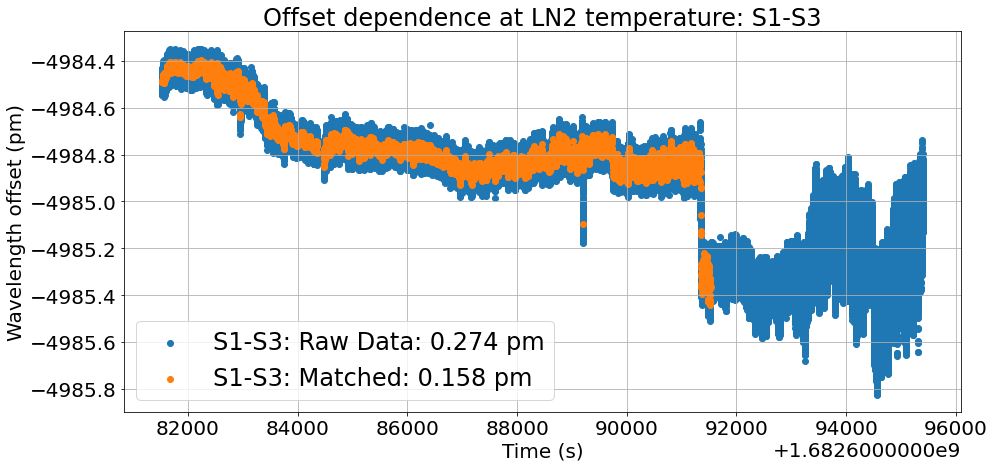

In [20]:
plt.figure(figsize=(15,7))
plt.scatter(peaks["Timestamp"], peaks["Wav1-1"]*1e12 - peaks["Wav1-3"]*1e12 + 4991,
         label="S1-S3: Raw Data: {0:.3f} pm".format(np.std(peaks["Wav1-1"]*1e12 - peaks["Wav1-3"]*1e12)))
plt.scatter(matched["Timestamp"], matched["pavWav1-1"]*1e12 - matched["pavWav1-3"]*1e12 + 4991,
         label="S1-S3: Matched: {0:.3f} pm".format(np.std(matched["pavWav1-1"]*1e12 - matched["pavWav1-3"]*1e12)))
plt.ylabel("Wavelength offset (pm)")
plt.xlabel("Time (s)")
plt.title("Offset dependence at LN2 temperature: S1-S3")
plt.legend()

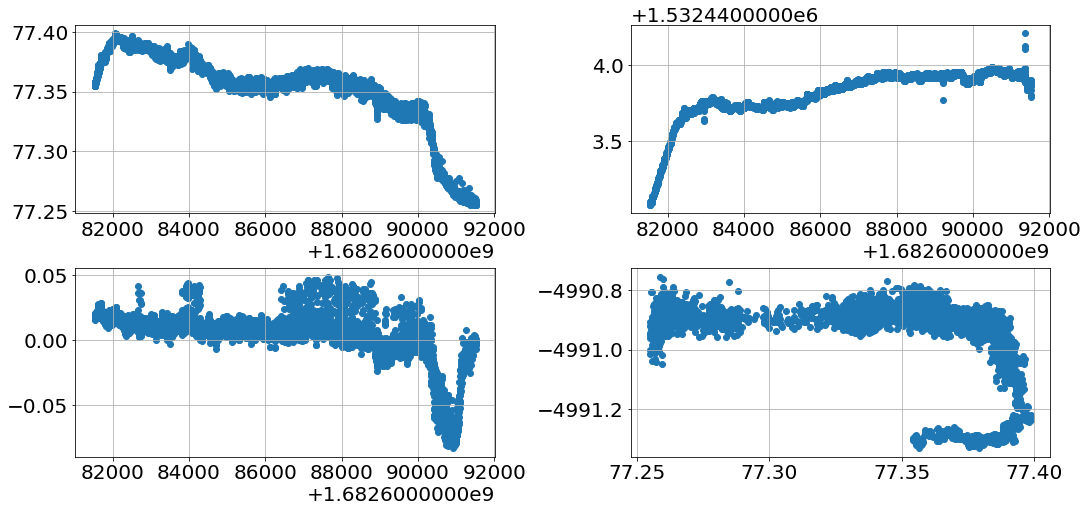

In [16]:
fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
fig.set_size_inches((15,7))
axes[0].scatter(
    matched["Timestamp"],
    matched["tempT1"],
    label="Temperature by RTD1"
    )
axes[1].scatter(
    matched["Timestamp"],
    matched["pavWav1-1"]*1e12, 
    label="FBG1"
)
axes[2].scatter(
    matched["Timestamp"],
    matched["tempT1"]-matched["tempT2"],
    label="RTD1-RTD2"
    )
axes[3].scatter(
    matched["tempT1"],
    (matched["pavWav1-1"])*1e12 - matched["pavWav1-2"]*1e12,
    label="FBG1-FBG2"
)